In [1]:
test_case = 0

In [2]:
import numpy as np

########################
# File Data
########################
filename0_ = 'test_case_'+str(test_case)+'/test_case_'+str(test_case)
savetopath_ = './'

########################
# Bayes Risk Parameters
########################
max_it_BR_ = 30
num_randparams_ = 50
space_size_ = np.arange(-8,3)
truncation_ = 2
bayes_params_ = [max_it_BR_, num_randparams_, space_size_,truncation_]

########################
# Experiment Parameters
########################
n_train_ = 2000
n_predict_ = 48
n_testbefore_ = 49
multiplier_ = 20.0 
bandwidth_ = 50.0

exp_params_ = [n_train_, n_predict_, n_testbefore_, multiplier_, bandwidth_]

########################
# Truth Parameters
########################
apriori_f_mean_ = 0.0 
alpha_ = 1.0
f0_ = 10.0
p_ = -1 #1 #-2 #-1 #0.0
J_ = 2
jstart_ = 1 # (not zero)
pdf_type_u_ = 'Uniform'
      
true_noise_params_ = [apriori_f_mean_, pdf_type_u_, alpha_, f0_, p_, J_, jstart_]

########################
# Measurement Noise 
########################
msmt_noise_mean_ = 0.0 
msmt_noise_level_ = 0.01 

msmt_noise_params_ = [msmt_noise_mean_, msmt_noise_level_]

########################
# Kalman Parameters
########################
p0_ = 10000.0 
x0_ = 1.0
optimal_sigma_ = 0.1
optimal_R_ = 0.1
b_delta_ = 0.5 

max_it_ = 75

kalman_params_ = [optimal_sigma_, optimal_R_, x0_, p0_, b_delta_]

########################
# Skip Msmts
########################
skip =1

########################
# Max Forecast Step for Bayes Risk
########################

max_forecast_step = n_predict_

In [3]:
from analysis_tools.riskanalysis import Create_KF_Experiment

Test_Object = Create_KF_Experiment(bayes_params_, filename0_, savetopath_, max_it_, exp_params_, kalman_params_, msmt_noise_params_, 
                                   true_noise_params_, user_defined_variance=None)

In [4]:
Test_Object.naive_implementation()

Time Taken for BR Map:  2090.19581604


Max Forecasting Time Step for Forecasting Loss Calc set to = 48
Optimal params [ 0.00141902  0.07543673] [  5.78051424e-05   1.35933756e-05]
Prediction
Loss Minimising Point Index: 32
Optimal Hyper Parameters:  [ 0.00141902  0.07543673]
Loss Value 1.07903833942
Forecasting
Loss Minimising Point Index: 38
Optimal Hyper Parameters:  [  5.78051424e-05   1.35933756e-05]
Loss Value 0.194989569193


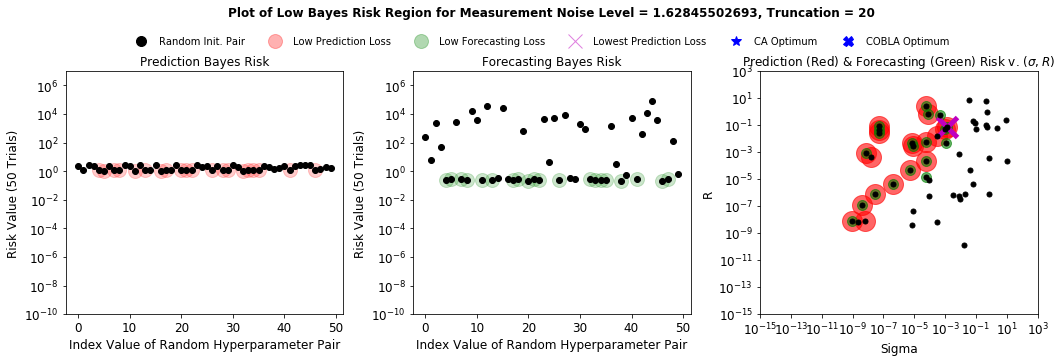

In [5]:
from analysis_tools.plot_BR import Plot_BR_Results

filename_and_path_BR = './'+str(Test_Object.filename_BR)+'.npz'
plotter_BR = Plot_BR_Results(filename_and_path_BR)
plotter_BR.make_plot()

In [6]:
Test_Object.get_tuned_params(int(max_forecast_step))
Test_Object.set_tuned_params()

Optimal params [ 0.00141902  0.07543673] [  5.78051424e-05   1.35933756e-05]


In [7]:
from analysis_tools.plot_KF import Plot_KF_Results

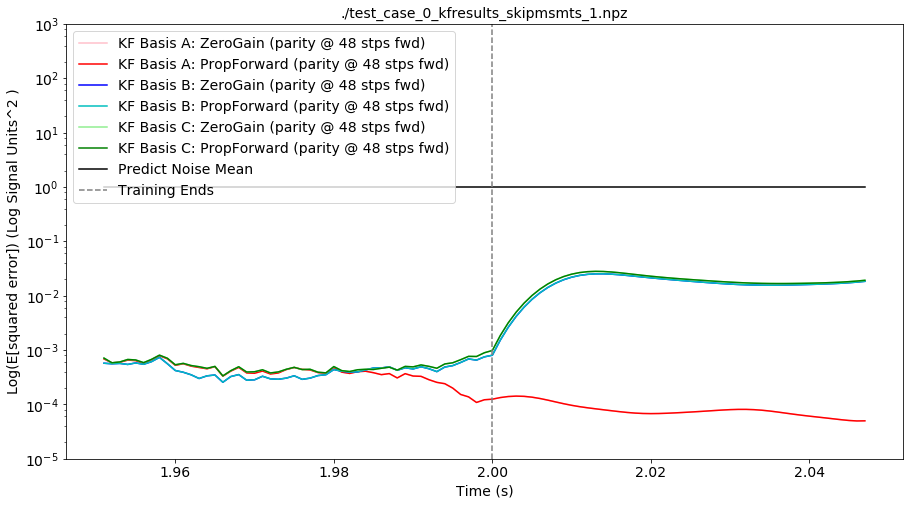

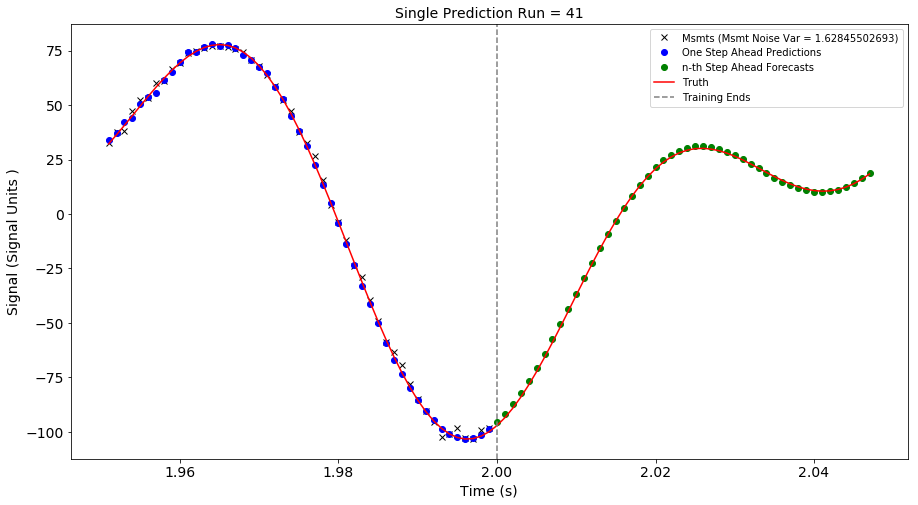

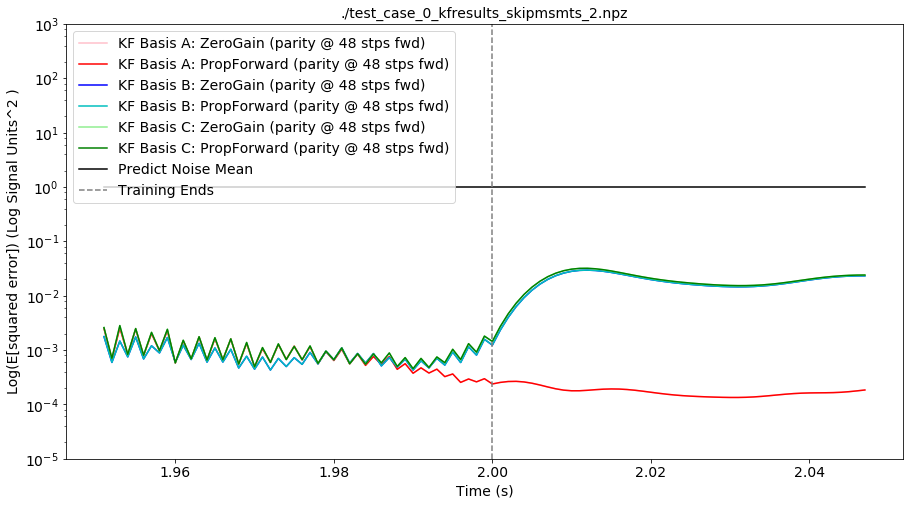

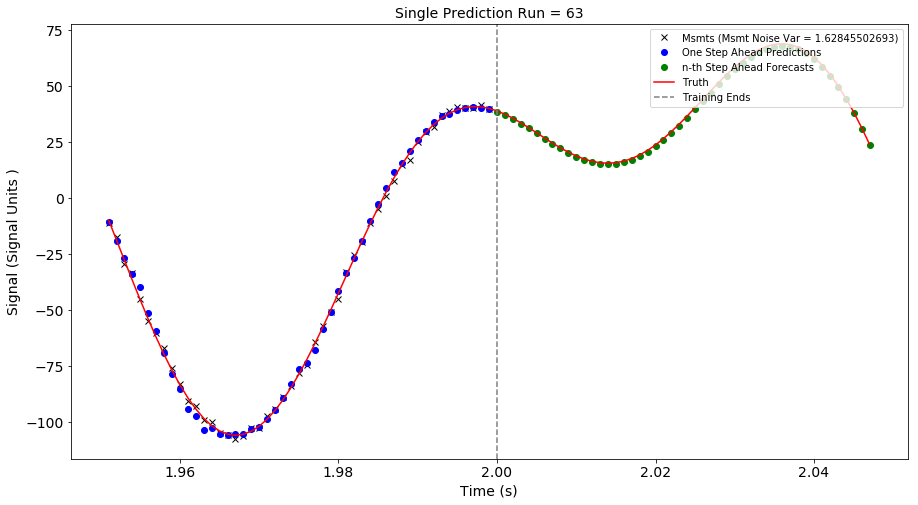

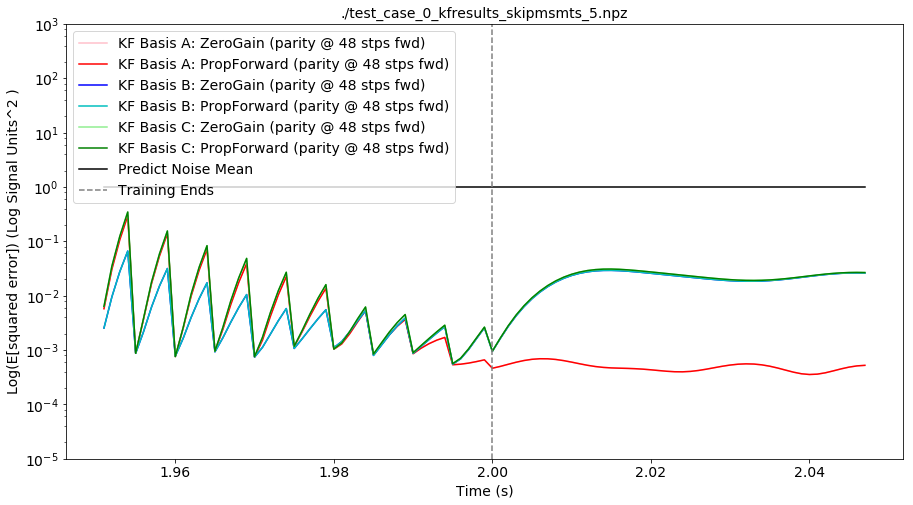

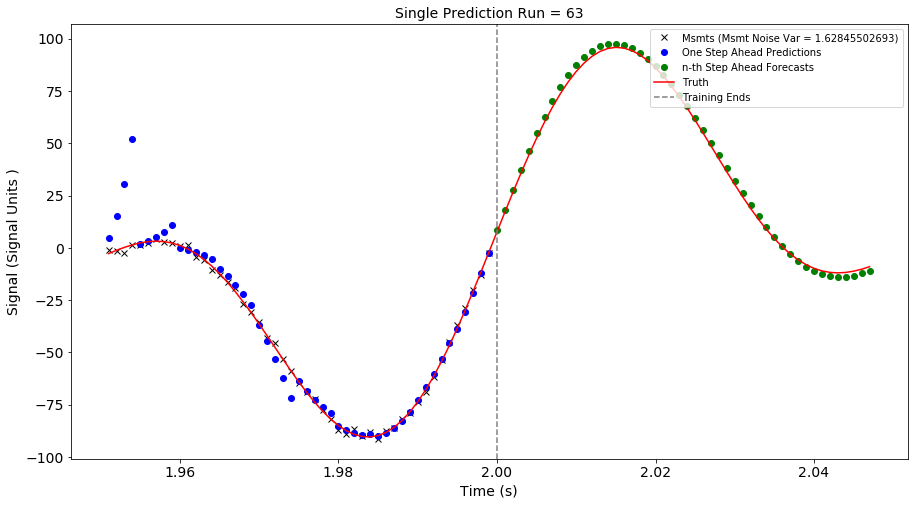

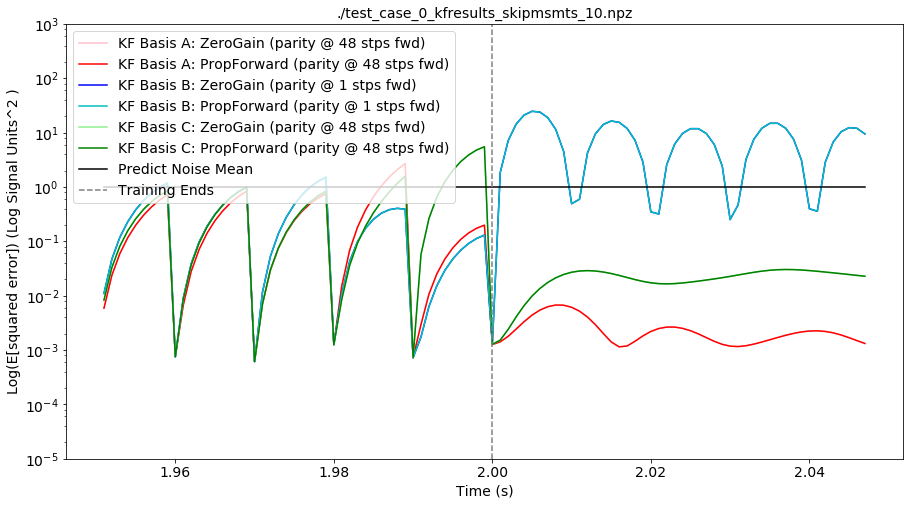

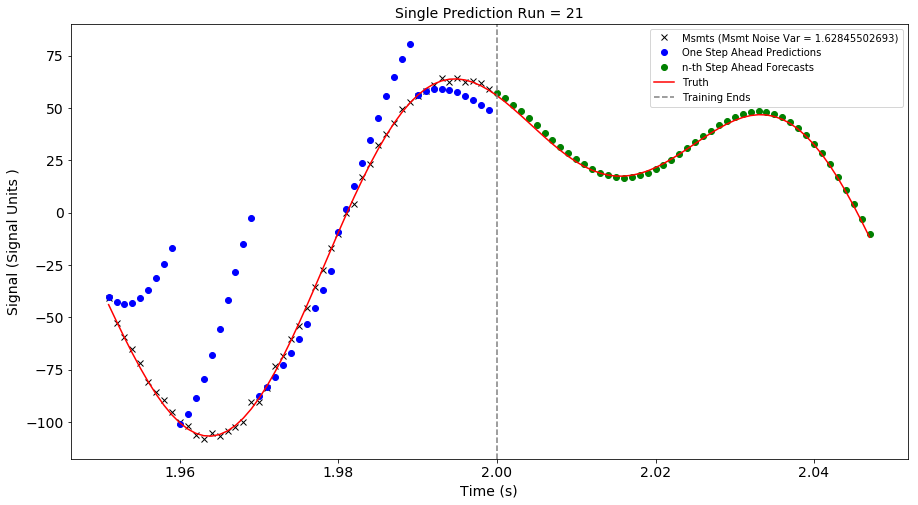

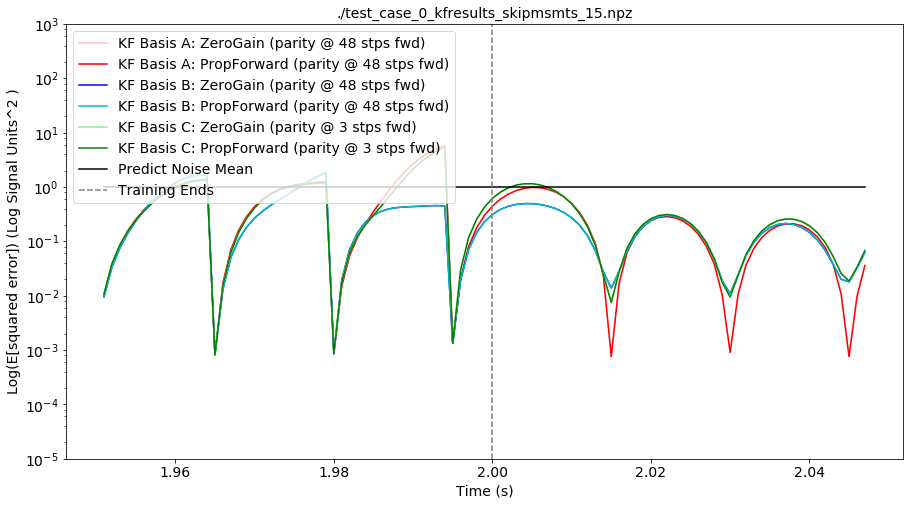

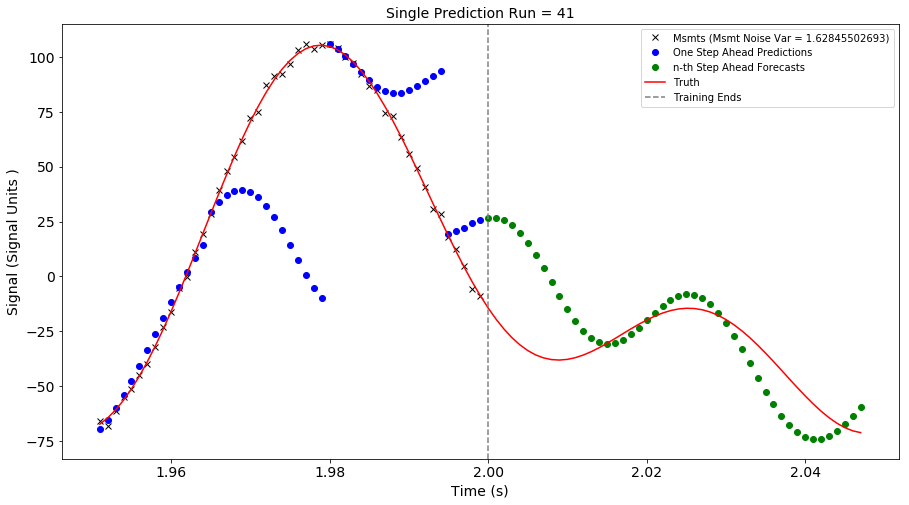

In [8]:
for skip in [1, 2, 5, 10 ,15]:
    filename_skippy = './'+str(Test_Object.filename_KF)+'_skipmsmts_'+str(skip)+'.npz'
    Test_Object.ensemble_avg_predictions(skip)
    plotter_KF = Plot_KF_Results(exp_params_, filename_skippy)
    plotter_KF.make_plot()
    plotter_KF.show_one_prediction()

In [9]:
truth, data = Test_Object.generate_data_from_truth(None)

In [10]:
import kf.fast_2 as skf
import kf.detailed as dkf

In [11]:



filename_skippy = './'+str(Test_Object.filename_KF)+'_skipmsmts_'+str(skip)+'.npz'
pred_skf = skf.kf_2017(data, 
                       n_train_, n_testbefore_, n_predict_, Test_Object.Delta_T_Sampling, 
                       x0_, p0_, Test_Object.optimal_sigma, Test_Object.optimal_R, Test_Object.basisA, 
                       phase_correction=0 ,prediction_method="PropForward", skip_msmts=skip,
                       descriptor=filename_skippy+'SKF') 

pred_dkf, amps_dkf = dkf.detailed_kf("DKF", data, 
                                     n_train_, n_testbefore_, n_predict_, Test_Object.Delta_T_Sampling, 
                                     x0_,p0_, Test_Object.optimal_sigma, Test_Object.optimal_R,
                                     Test_Object.basisA, 0.0, skip_msmts=skip)

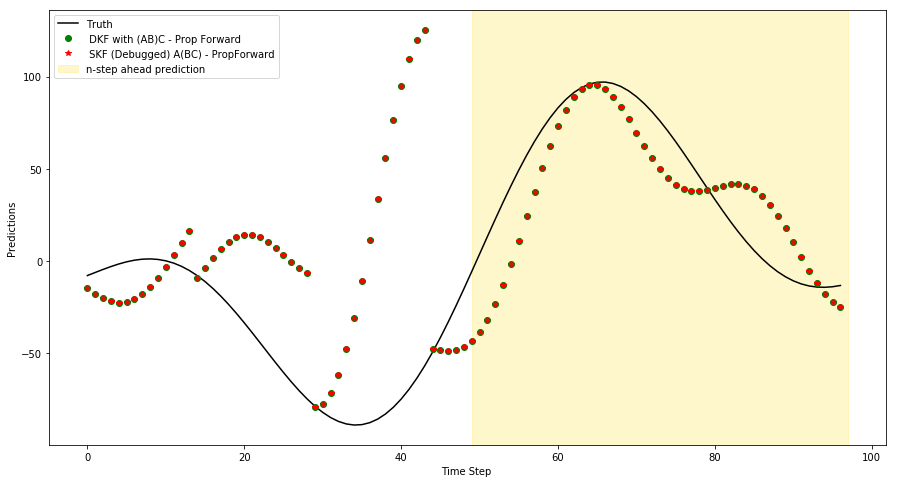

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
i=0
item = 'x_hat'
plt.xlabel('Time Step ')
plt.ylabel('Predictions')
plt.plot(truth[n_train_ - n_testbefore_: n_train_ + n_predict_], 'k', label='Truth')
plt.plot(pred_dkf, 'go', label=' DKF with (AB)C - Prop Forward')
plt.plot(pred_skf, 'r*', label=' SKF (Debugged) A(BC) - PropForward')
plt.axvspan(n_testbefore_,n_testbefore_+n_predict_, ymin=0, ymax=1, color='gold', alpha=0.2, 
            label='n-step ahead prediction ')
plt.legend(loc=2)
plt.show()
plt.savefig('./'+str(Test_Object.filename_KF)+'_skipmsmts_'+str(skip)+'_Predictions.svg', format="svg")

In [52]:
from kf.common import calc_inst_params
amp_object = np.load(filename_skippy+'SKF.npz')
instantA_skf = np.array([calc_inst_params(amp_object['x_hat'][:,:,x])[0] for x in range(n_predict_+n_train_)]).T

In [51]:
instantA_dkf = np.load('DKF.npz')['instantA']

(100, 2048)

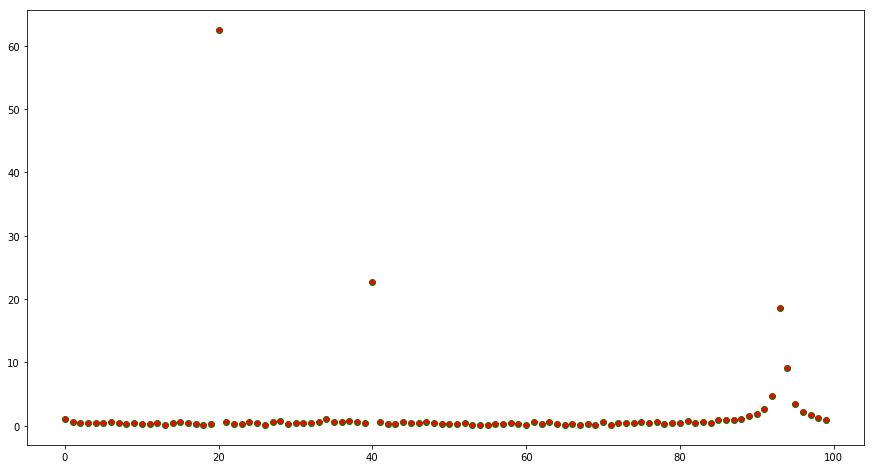

In [55]:
plt.figure(figsize=(15,8))
plt.plot(instantA_dkf[:,n_train_], 'go', label=' DKF with (AB)C - Prop Forward')
plt.plot(instantA_skf[:,n_train_], 'r*', label=' SKF (Debugged) A(BC) - PropForward')
plt.show()